In [14]:
# our standard imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as miss


# Preprocessing tools
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Models and evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## matplotlib style


fav_style = ('ggplot','tableau-colorblind10')
fav_context = {'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

# Set global scikit_learn configuration
from sklearn import set_config
set_config(display='diagram')

In [15]:
import sys
sys.path.append('Documents/Supermarket/Data/data_enrichment.py')

In [16]:
pip install CODE

ERROR: Could not find a version that satisfies the requirement CODE (from versions: none)
ERROR: No matching distribution found for CODE
Note: you may need to restart the kernel to use updated packages.


In [17]:
## Importing Custom Functions
%load_ext autoreload
%autoreload 2
from CODE import data_enrichment as de


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# loading the data files 
df = pd.read_csv('/Users/christianrim/Documents/Supermarket/Data/sales_prediction.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [19]:
# observe the values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [20]:
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable')

There are 8523 rows, and 12 columns.
The rows represent 8523 observations, and the columns represent 11 features and 1 target variable


In [21]:
# clean extra spaces 
df.columns = df.columns.str.strip()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [22]:
pd.set_option('display.max_columns',0)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### **Remove Unnecessary Columns**

- There are no columns to drop

### **Remove Unecessary Rows**

### **Remove Duplicates**




In [23]:
# Display the number of duplicate rows in the data
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [24]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(8523, 12)

In [25]:
# identifying missing data 
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [26]:
# identifying missing values
print(df.isna().sum().sum(), 'missing values')

3873 missing values


<AxesSubplot: >

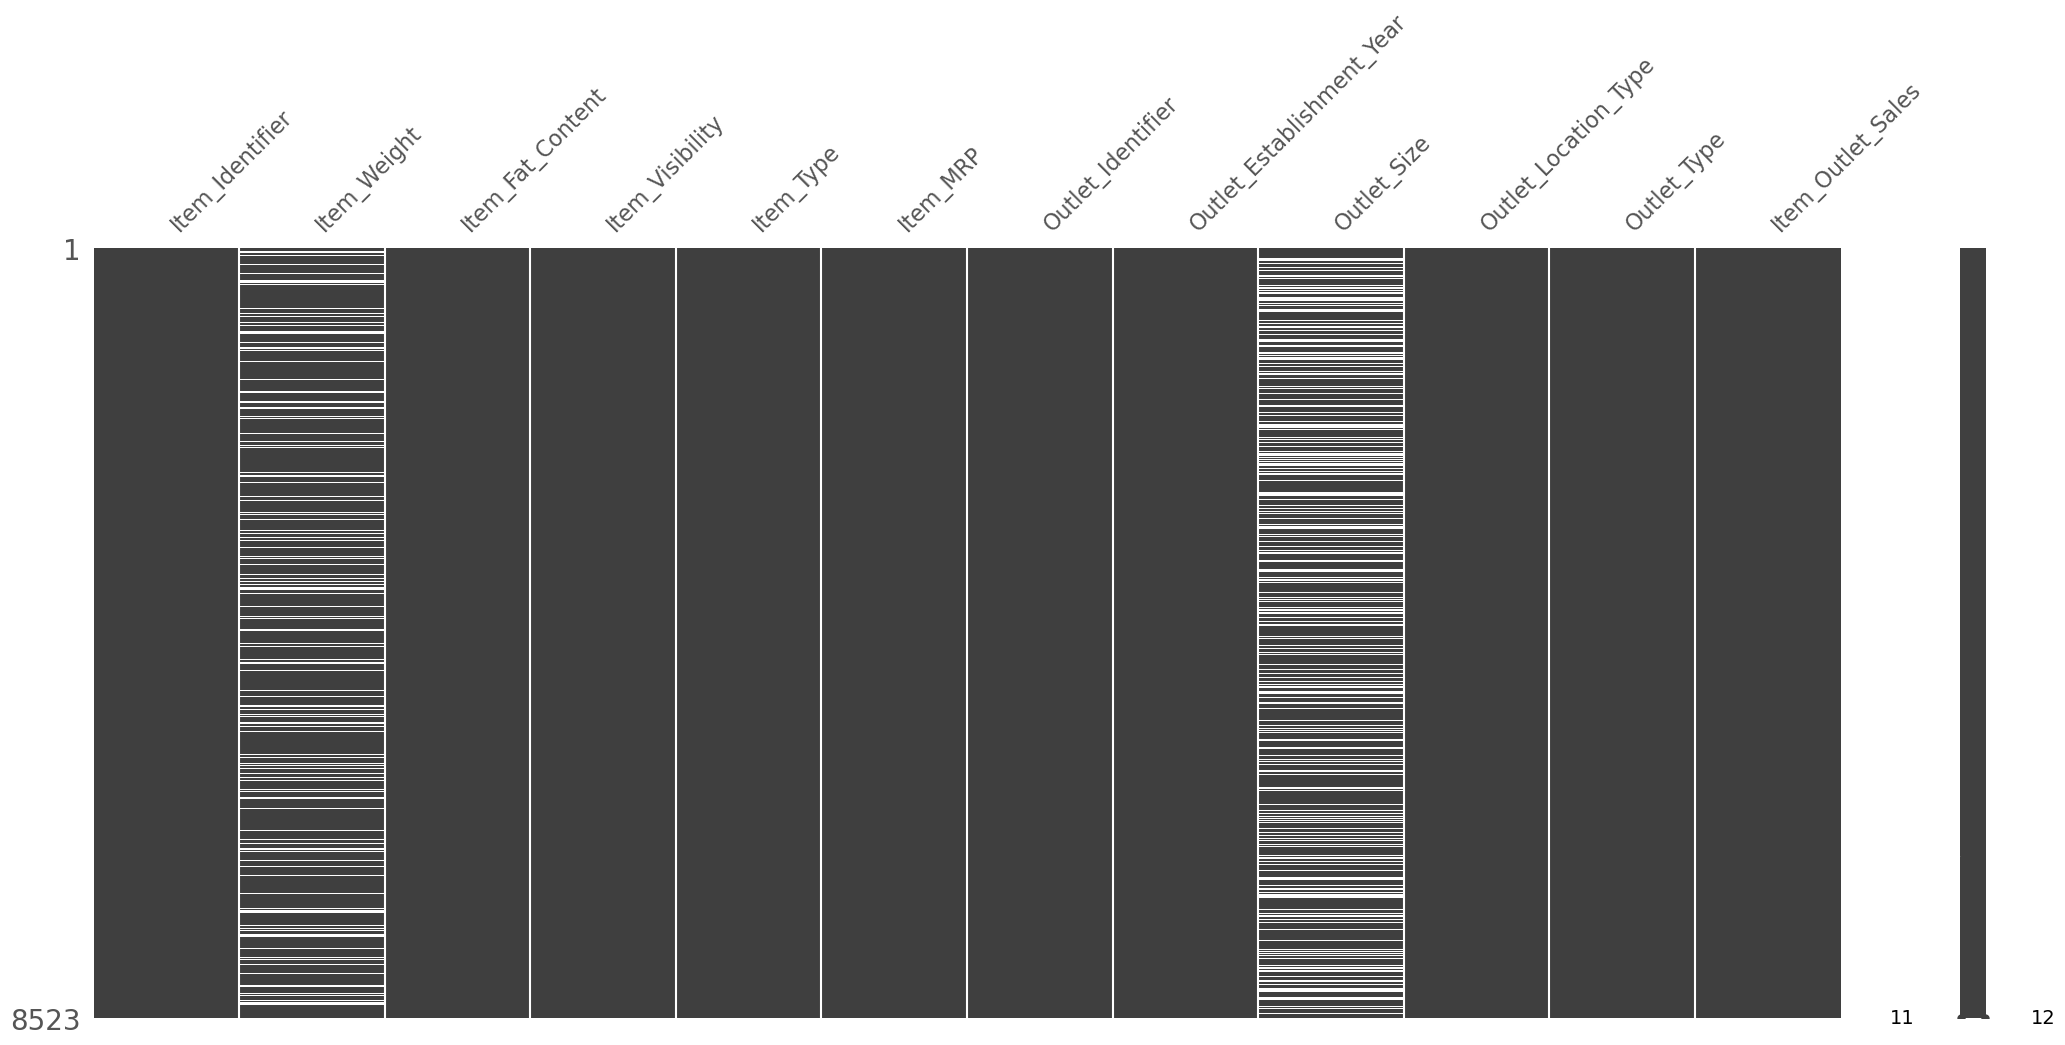

In [27]:
miss.matrix(df)

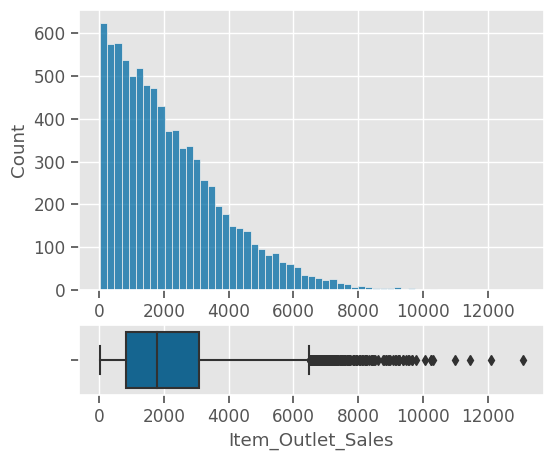

In [28]:
target = 'Item_Outlet_Sales'

grid_spec = {'height_ratios':[0.8,0.2]}
fig, axes = plt.subplots(nrows=2, figsize=(6,5), gridspec_kw=grid_spec)

sns.histplot(data=df, x=target, ax=axes[0])
sns.boxplot(data=df, x=target, ax=axes[1]);

#### **'Item_Fat_Content' Column**

In [29]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

#### **Missing values in Item Weight**

In [30]:
# loop through the index values 
for ind in df.index:
  item_filter = df['Item_Identifier'] == df.loc[ind,'Item_Identifier']

  # measuring the rounded value of the mean 'item_weight' of this rows 'item_identifier'
  item_weight_avg = round(df.loc[item_filter,'Item_Weight'].mean(), 3)

  # assign the average item weight to the 'Item_Weight' column
  df.loc[ind, 'Item_Weight'] = item_weight_avg 

print(df.Item_Weight.isnull().sum())
df[df.Item_Weight.isnull()]

4


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


#### **Missing Values in Outlet_Size**

In [31]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [32]:
df.Outlet_Size.fillna('Unknown',inplace=True)
df['Outlet_Size'].unique()

array(['Medium', 'Unknown', 'High', 'Small'], dtype=object)

### **Inspect Column Names for Errors**

In [33]:
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

#### **Numeric Columns**

In [34]:
df.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875420,0.066132,140.992782,1997.831867,2181.288914
std,4.646098,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### **Categorical Columns**

In [35]:
df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,5,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [36]:
df.groupby(['Item_Fat_Content'])['Item_Fat_Content'].count()

Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Item_Fat_Content, dtype: int64

In [37]:
dict = {'low fat': 'Low Fat', 'reg':'Regular', 'LF':'Low Fat'}
df.replace({'Item_Fat_Content':dict}, inplace=True)

df.groupby(['Item_Fat_Content'])['Item_Fat_Content'].count()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [38]:
df.groupby(['Item_Type'])['Item_Type'].count()

Item_Type
Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1200
Soft Drinks               445
Starchy Foods             148
Name: Item_Type, dtype: int64

In [39]:
df.groupby(['Outlet_Size'])['Outlet_Size'].count()

Outlet_Size
High        932
Medium     2793
Small      2388
Unknown    2410
Name: Outlet_Size, dtype: int64

#### **Changing the values in columns**

In [40]:
#  getting categorical and numerical columns 
cat_cols = df.select_dtypes(exclude='object').columns.to_list()
num_cols = df.select_dtypes(exclude='number').columns.to_list()

print('Categorical Columns: ', cat_cols)
print('Numerical Columns: ', num_cols)

Categorical Columns:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
Numerical Columns:  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


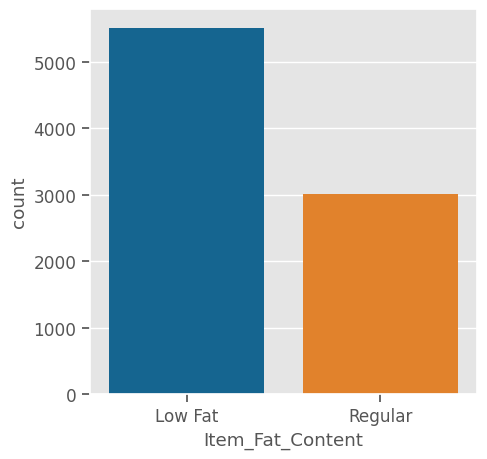

In [41]:
# displaying a chart of the item fat content 
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

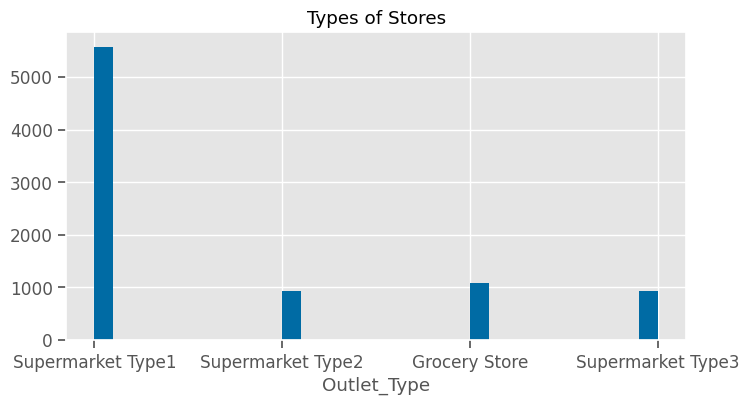

In [42]:
#Maximum Retail Price Distribution - OOP with ax.set()
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(df['Outlet_Type'],bins=30);
ax.set(xlabel="Outlet_Type", 
       title='Types of Stores');

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

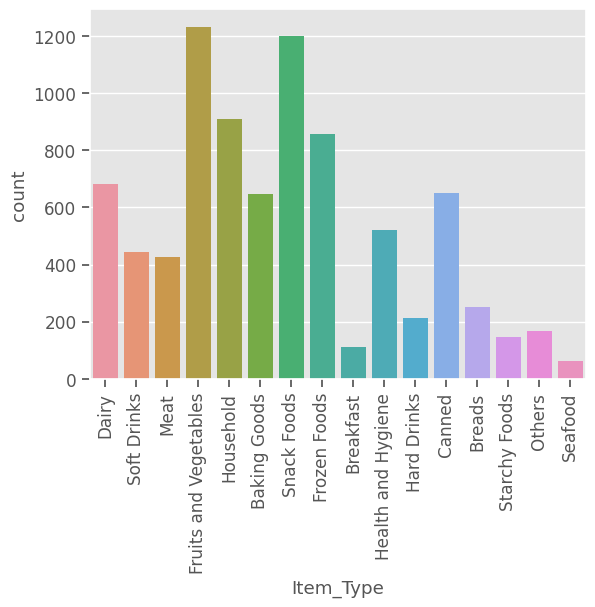

In [43]:
# displays the various products sold 
labels = list(df['Item_Type'].unique())
chart = sns.countplot(x=df['Item_Type'])
chart.set_xticklabels(labels=labels, rotation=90)

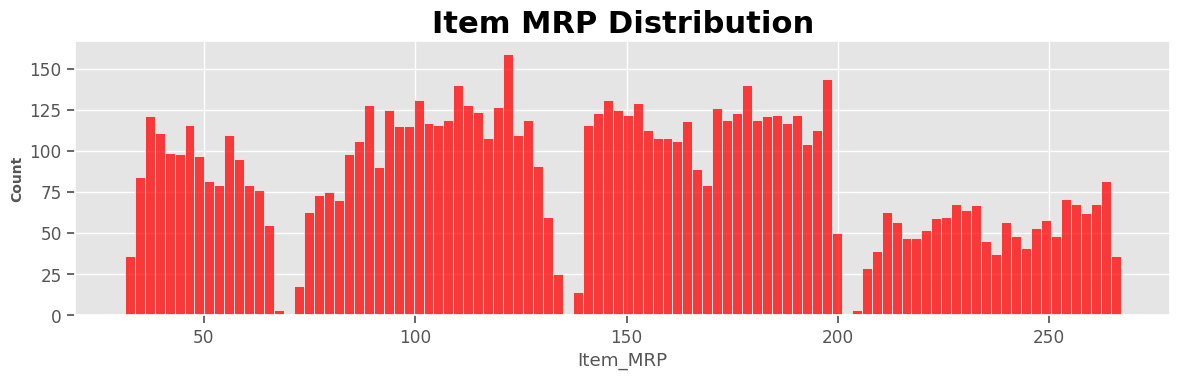

In [44]:
plt.figure(figsize=(12,4))

sns.histplot(data=df, x='Item_MRP',color='r', bins=100);

plt.title('Item MRP Distribution', fontsize=22,weight='bold')
plt.ylabel('Count', fontsize=10,weight='bold')

plt.tight_layout()
plt.show()

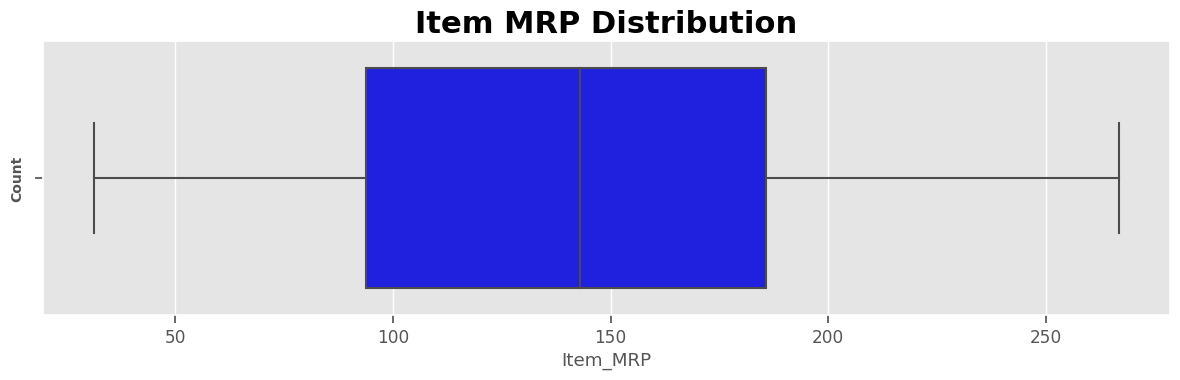

In [45]:
plt.figure(figsize=(12,4))

sns.boxplot(data=df, x='Item_MRP',color='b');

plt.title('Item MRP Distribution', fontsize=22,weight='bold')
plt.ylabel('Count', fontsize=10,weight='bold')

plt.tight_layout()
plt.show()

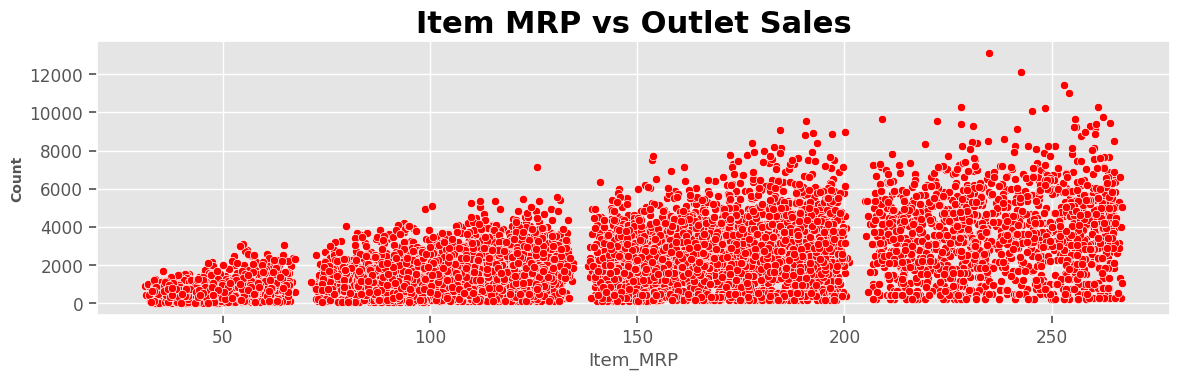

In [46]:
plt.figure(figsize=(12,4))

sns.scatterplot(data=df, x='Item_MRP',y='Item_Outlet_Sales',color='r')

plt.title('Item MRP vs Outlet Sales', fontsize=22,weight='bold')
plt.ylabel('Count', fontsize=10,weight='bold')

plt.tight_layout()
plt.show()

array([[<AxesSubplot: title={'center': 'Item_Weight'}>,
        <AxesSubplot: title={'center': 'Item_Visibility'}>],
       [<AxesSubplot: title={'center': 'Item_MRP'}>,
        <AxesSubplot: title={'center': 'Outlet_Establishment_Year'}>],
       [<AxesSubplot: title={'center': 'Item_Outlet_Sales'}>,
        <AxesSubplot: >]], dtype=object)

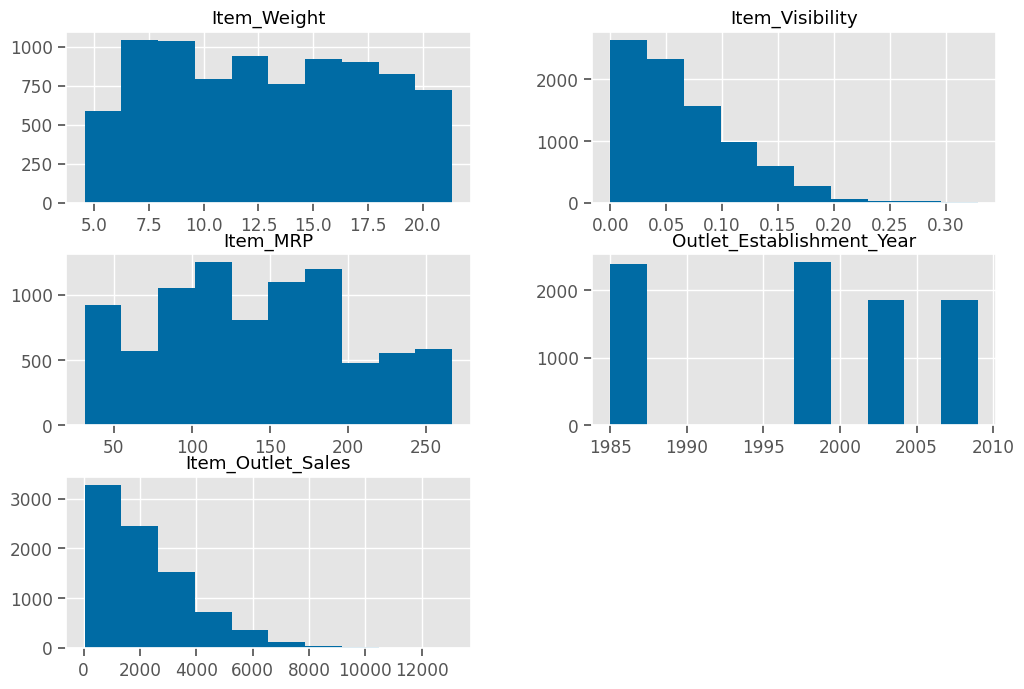

In [47]:
df.hist(figsize=(12,8))

/var/folders/mm/04nbg7g95pgdtd1s3081zgfh0000gn/T/ipykernel_1682/3728401302.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<AxesSubplot: >

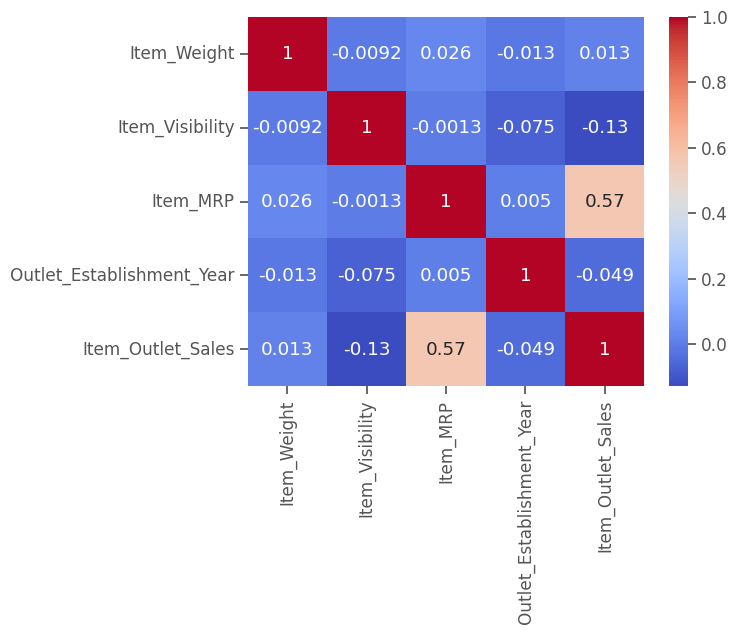

In [48]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

## **Data Preprocessing**

In [49]:
# train test split
target = 'Item_Outlet_Sales'
drop_feats = []

y = df[target].copy()
X = df.drop(columns=[target, *drop_feats]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=SEED)
X_train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8269,FDI60,7.220,Regular,0.064142,Baking Goods,61.2510,OUT010,1998,Unknown,Tier 3,Grocery Store
7604,DRD25,6.135,Low Fat,0.079294,Soft Drinks,111.2860,OUT018,2009,Medium,Tier 3,Supermarket Type2
2762,NCP18,12.150,Low Fat,0.028593,Household,151.0708,OUT035,2004,Small,Tier 2,Supermarket Type1
6464,NCS30,5.945,Low Fat,0.093009,Household,127.8652,OUT035,2004,Small,Tier 2,Supermarket Type1
4707,FDI08,18.200,Regular,0.066285,Fruits and Vegetables,247.2092,OUT035,2004,Small,Tier 2,Supermarket Type1


In [50]:
# making the numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer())])

In [51]:
# making the categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))


In [52]:
## making the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe,num_sel),
                                      (cat_pipe,cat_sel),)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x161063c10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x161049e80>)])

In [53]:
preprocessor.fit(X_train)
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns=preprocessor.get_feature_names_out(),
                          index=X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          columns=preprocessor.get_feature_names_out(),
                          index=X_test.index)
display(X_train_df)

,pipeline-1__Item_Weight,pipeline-1__Item_Visibility,pipeline-1__Item_MRP,pipeline-1__Outlet_Establishment_Year,pipeline-2__Item_Identifier_DRA12,pipeline-2__Item_Identifier_DRA24,pipeline-2__Item_Identifier_DRA59,pipeline-2__Item_Identifier_DRB01,pipeline-2__Item_Identifier_DRB13,pipeline-2__Item_Identifier_DRB24,pipeline-2__Item_Identifier_DRB25,pipeline-2__Item_Identifier_DRB48,pipeline-2__Item_Identifier_DRC01,pipeline-2__Item_Identifier_DRC12,pipeline-2__Item_Identifier_DRC13,pipeline-2__Item_Identifier_DRC24,pipeline-2__Item_Identifier_DRC25,pipeline-2__Item_Identifier_DRC27,pipeline-2__Item_Identifier_DRC36,pipeline-2__Item_Identifier_DRC49,pipeline-2__Item_Identifier_DRD01,pipeline-2__Item_Identifier_DRD12,pipeline-2__Item_Identifier_DRD13,pipeline-2__Item_Identifier_DRD15,pipeline-2__Item_Identifier_DRD24,pipeline-2__Item_Identifier_DRD25,pipeline-2__Item_Identifier_DRD27,pipeline-2__Item_Identifier_DRD37,pipeline-2__Item_Identifier_DRD49,pipeline-2__Item_Identifier_DRD60,pipeline-2__Item_Identifier_DRE01,pipeline-2__Item_Identifier_DRE03,pipeline-2__Item_Identifier_DRE12,pipeline-2__Item_Identifier_DRE13,pipeline-2__Item_Identifier_DRE15,pipeline-2__Item_Identifier_DRE25,pipeline-2__Item_Identifier_DRE27,pipeline-2__Item_Identifier_DRE37,pipeline-2__Item_Identifier_DRE48,pipeline-2__Item_Identifier_DRE49,...,pipeline-2__Item_Identifier_NCZ54,pipeline-2__Item_Fat_Content_Low Fat,pipeline-2__Item_Fat_Content_Regular,pipeline-2__Item_Type_Baking Goods,pipeline-2__Item_Type_Breads,pipeline-2__Item_Type_Breakfast,pipeline-2__Item_Type_Canned,pipeline-2__Item_Type_Dairy,pipeline-2__Item_Type_Frozen Foods,pipeline-2__Item_Type_Fruits and Vegetables,pipeline-2__Item_Type_Hard Drinks,pipeline-2__Item_Type_Health and Hygiene,pipeline-2__Item_Type_Household,pipeline-2__Item_Type_Meat,pipeline-2__Item_Type_Others,pipeline-2__Item_Type_Seafood,pipeline-2__Item_Type_Snack Foods,pipeline-2__Item_Type_Soft Drinks,pipeline-2__Item_Type_Starchy Foods,pipeline-2__Outlet_Identifier_OUT010,pipeline-2__Outlet_Identifier_OUT013,pipeline-2__Outlet_Identifier_OUT017,pipeline-2__Outlet_Identifier_OUT018,pipeline-2__Outlet_Identifier_OUT019,pipeline-2__Outlet_Identifier_OUT027,pipeline-2__Outlet_Identifier_OUT035,pipeline-2__Outlet_Identifier_OUT045,pipeline-2__Outlet_Identifier_OUT046,pipeline-2__Outlet_Identifier_OUT049,pipeline-2__Outlet_Size_High,pipeline-2__Outlet_Size_Medium,pipeline-2__Outlet_Size_Small,pipeline-2__Outlet_Size_Unknown,pipeline-2__Outlet_Location_Type_Tier 1,pipeline-2__Outlet_Location_Type_Tier 2,pipeline-2__Outlet_Location_Type_Tier 3,pipeline-2__Outlet_Type_Grocery Store,pipeline-2__Outlet_Type_Supermarket Type1,pipeline-2__Outlet_Type_Supermarket Type2,pipeline-2__Outlet_Type_Supermarket Type3
8269,7.220,0.064142,61.2510,1998.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7604,6.135,0.079294,111.2860,2009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2762,12.150,0.028593,151.0708,2004.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6464,5.945,0.093009,127.8652,2004.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0

### Getting the feature names + Verbose Feature Names Out

In [54]:
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out=False)
preprocessor.fit(X_train)
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_test.index)
display(X_train_df)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,Item_Identifier_DRC13,Item_Identifier_DRC24,Item_Identifier_DRC25,Item_Identifier_DRC27,Item_Identifier_DRC36,Item_Identifier_DRC49,Item_Identifier_DRD01,Item_Identifier_DRD12,Item_Identifier_DRD13,Item_Identifier_DRD15,Item_Identifier_DRD24,Item_Identifier_DRD25,Item_Identifier_DRD27,Item_Identifier_DRD37,Item_Identifier_DRD49,Item_Identifier_DRD60,Item_Identifier_DRE01,Item_Identifier_DRE03,Item_Identifier_DRE12,Item_Identifier_DRE13,Item_Identifier_DRE15,Item_Identifier_DRE25,Item_Identifier_DRE27,Item_Identifier_DRE37,Item_Identifier_DRE48,Item_Identifier_DRE49,...,Item_Identifier_NCZ54,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8269,7.220,0.064142,61.2510,1998.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7604,6.135,0.079294,111.2860,2009.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2762,12.150,0.028593,151.0708,2004.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6464,5.945,0.093009,127.8652,2004.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4707,18.200,0.066285,247.2092,2004.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,18.250,0.012216,162.7894,1985.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

## Linear Regression Model

In [55]:
def evaluate_regression(model, X_train,y_train, X_test, y_test, for_slides=True): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)

    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)

    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")
    
    if for_slides:
        df_version =[['Split','R^2','MAE','RMSE']]
        df_version.append(['Train',r2_train, mae_train, rmse_train])
        df_version.append(['Test',r2_test, mae_test, rmse_test])
        df_results = pd.DataFrame(df_version[1:], columns=df_version[0])
        df_results = df_results.round(2)
        display(df_results.style.hide(axis='index').format(precision=2, thousands=','))
        
    else: 
        print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")
    
    

## Model 1: Baseline Linear Model 

In [56]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, 
                    X_test_df, y_test)


Training Data:	R^2= 0.67	RMSE= 973.72
Test Data:	R^2= -36248869837991920.00	RMSE= 334394254054.17


Split,R^2,MAE,RMSE
Train,0.67,725.74,973.72
Test,"-36,248,869,837,991,920.00","17,721,434,803.59","334,394,254,054.17"


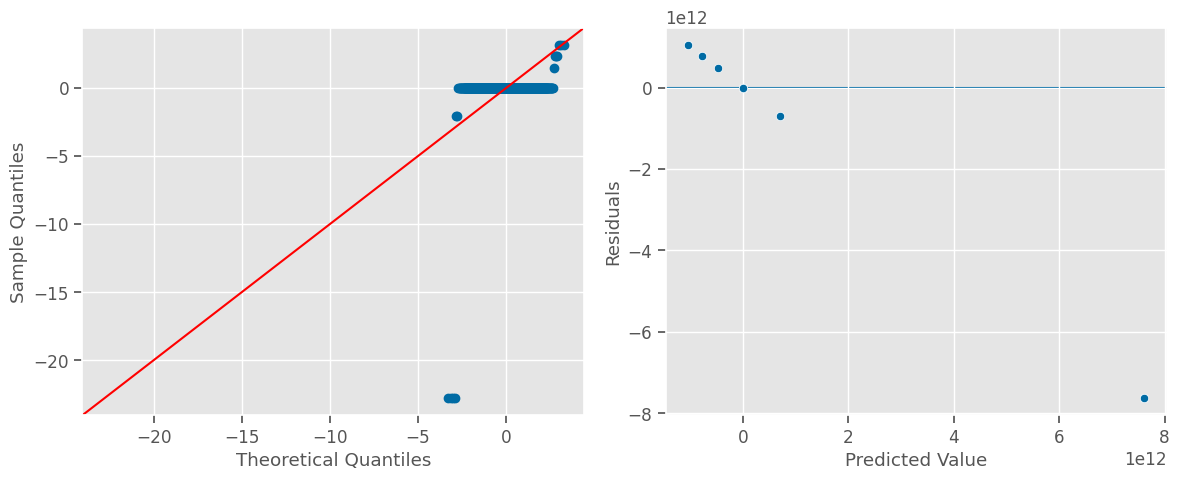

In [57]:
de.plot_residuals(lin_reg, X_test_df,y_test)


## Extracting and Visualizing Coefficients

### Extracting Coefficients

In [58]:
## accessing the coeffcients
lin_reg.coef_

array([ 1.18412045e+11, -7.85208740e+02, -1.11435547e+01, ...,
        1.59815292e+13, -2.28708050e+13, -8.49565322e+12])

In [59]:
## intercepts
lin_reg.intercept_

268906639759800.47

In [60]:
## saving the coeffcients
coeffs = pd.Series(lin_reg.coef_, index= lin_reg.feature_names_in_)
coeffs.loc['intercept'] = lin_reg.intercept_
coeffs

Item_Weight                      1.184120e+11
Item_Visibility                 -7.852087e+02
Item_MRP                        -1.114355e+01
Outlet_Establishment_Year       -1.441617e+11
Item_Identifier_DRA12           -2.257694e+11
                                     ...     
Outlet_Type_Grocery Store        1.890551e+12
Outlet_Type_Supermarket Type1    1.598153e+13
Outlet_Type_Supermarket Type2   -2.287081e+13
Outlet_Type_Supermarket Type3   -8.495653e+12
intercept                        2.689066e+14
Length: 1598, dtype: float64

In [61]:
def get_coefficients(lin_reg):
    coeffs = pd.Series(lin_reg.coef_, index= lin_reg.feature_names_in_)
    coeffs.loc['intercept'] = lin_reg.intercept_
    return coeffs

In [62]:
coeffs = get_coefficients(lin_reg)
coeffs

Item_Weight                      1.184120e+11
Item_Visibility                 -7.852087e+02
Item_MRP                        -1.114355e+01
Outlet_Establishment_Year       -1.441617e+11
Item_Identifier_DRA12           -2.257694e+11
                                     ...     
Outlet_Type_Grocery Store        1.890551e+12
Outlet_Type_Supermarket Type1    1.598153e+13
Outlet_Type_Supermarket Type2   -2.287081e+13
Outlet_Type_Supermarket Type3   -8.495653e+12
intercept                        2.689066e+14
Length: 1598, dtype: float64

In [63]:
## formatting numbers to not use , thousands sep, and 4 digits floats
pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
pd.set_option('display.max_rows', None)

In [64]:
coeffs.sort_values()

Outlet_Size_High                  -44,156,416,736,052.2344
Outlet_Type_Supermarket Type2     -22,870,805,004,449.4883
Item_Identifier_FDI57             -12,565,700,593,611.1445
Item_Identifier_FDI09             -12,516,772,096,828.2754
Item_Identifier_FDJ45             -12,317,035,303,993.5605
Item_Identifier_FDG21             -12,114,171,144,930.1055
Item_Identifier_FDH09             -11,707,213,270,968.6719
Item_Identifier_FDK45             -11,594,721,826,006.0059
Item_Identifier_FDH21             -11,446,114,707,853.9141
Item_Identifier_FDF33             -11,158,965,498,934.4004
Item_Identifier_FDJ57             -10,938,339,535,059.0332
Item_Identifier_FDG33             -10,695,002,783,126.3477
Outlet_Location_Type_Tier 1        -9,605,648,668,190.3496
Outlet_Type_Supermarket Type3      -8,495,653,216,449.7598
Item_Identifier_DRL47              -8,309,689,747,069.0723
Item_Identifier_DRP35              -8,209,039,507,291.1172
Item_Identifier_DRI23              -8,209,039,506,639.04

In [65]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3000,Low Fat,0.0160,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,"3,735.1380"
1,DRC01,5.9200,Regular,0.0193,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5000,Low Fat,0.0168,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,"2,097.2700"
3,FDX07,19.2000,Regular,0.0000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.9300,Low Fat,0.0000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [66]:
## Get a list of all of the ohe columsn
Item_Identifier_feats = [c for c in X_train_df.columns if c.startswith('Item_Identifier')]
len(Item_Identifier_feats)

1554

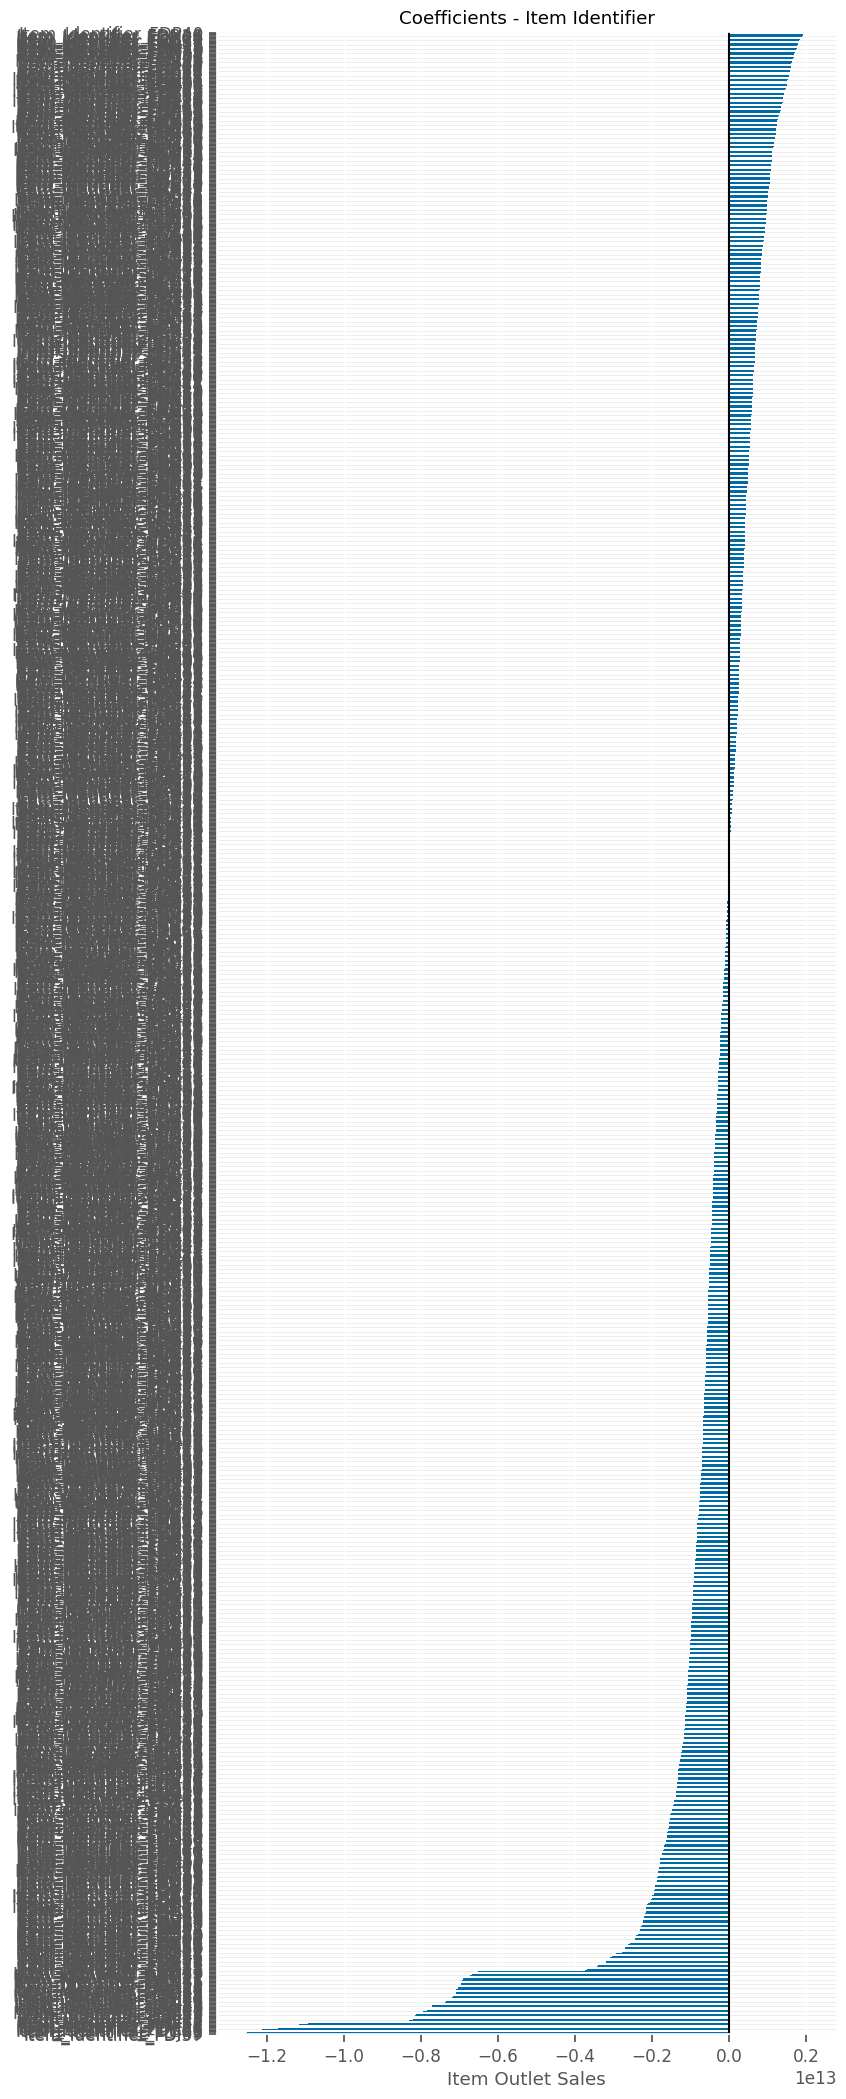

In [67]:
## plotting the item identifier coeffs
ax = coeffs[Item_Identifier_feats].sort_values().plot(kind='barh', figsize=(8,26))
ax.axvline(0,color='k')
ax.set(xlabel='Item Outlet Sales', title='Coefficients - Item Identifier');

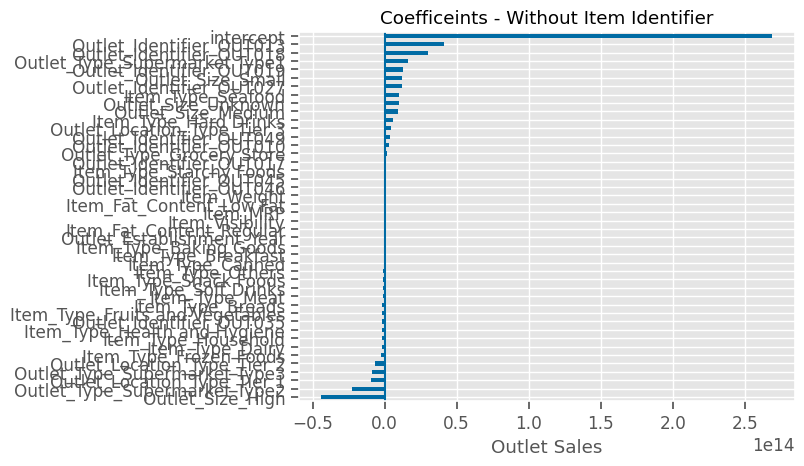

In [68]:
## plot everything but item identifier
ax = coeffs.drop(Item_Identifier_feats).sort_values().plot(kind='barh')
ax.axvline(0)
ax.set(xlabel='Outlet Sales', title='Coefficeints - Without Item Identifier');

## Model #2 - No Intercept


In [69]:
lin_reg_noint = LinearRegression(fit_intercept=False)
lin_reg_noint.fit(X_train_df,y_train)
evaluate_regression(lin_reg_noint, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.67	RMSE= 973.13
Test Data:	R^2= -184155773268.19	RMSE= 753709935.37


Split,R^2,MAE,RMSE
Train,0.67,725.32,973.13
Test,"-184,155,773,268.19","45,768,007.49","753,709,935.37"


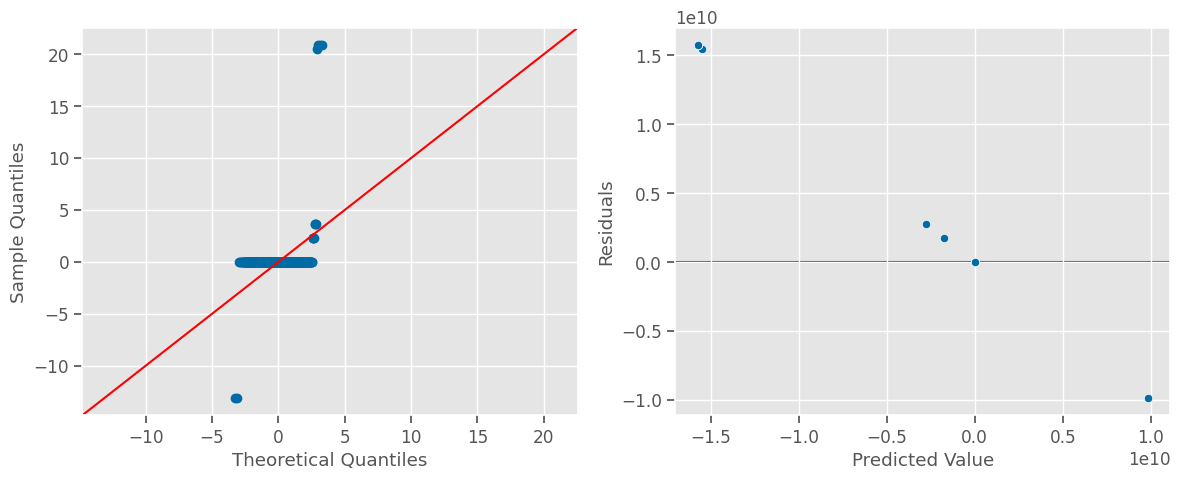

In [70]:
de.plot_residuals(lin_reg_noint, X_test_df,y_test)

In [71]:
coeffs_noint = get_coefficients(lin_reg_noint)
coeffs_noint

Item_Weight                         1,204,436,135.8246
Item_Visibility                              -793.1767
Item_MRP                                      -11.1447
Outlet_Establishment_Year              13,708,358.3623
Item_Identifier_DRA12               8,422,923,885.1581
Item_Identifier_DRA24              -4,839,045,736.8348
Item_Identifier_DRA59               8,506,107,162.9643
Item_Identifier_DRB01              13,493,598,437.6657
Item_Identifier_DRB13              11,101,667,289.7317
Item_Identifier_DRB24              11,813,411,846.0510
Item_Identifier_DRB25               7,579,817,740.0956
Item_Identifier_DRB48              -1,707,514,318.6842
Item_Identifier_DRC01              11,336,529,011.8697
Item_Identifier_DRC12                 895,198,699.9606
Item_Identifier_DRC13               8,518,150,195.6308
Item_Identifier_DRC24                 895,198,944.9929
Item_Identifier_DRC25              15,492,962,697.0610
Item_Identifier_DRC27              13,036,832,714.3711
Item_Ident

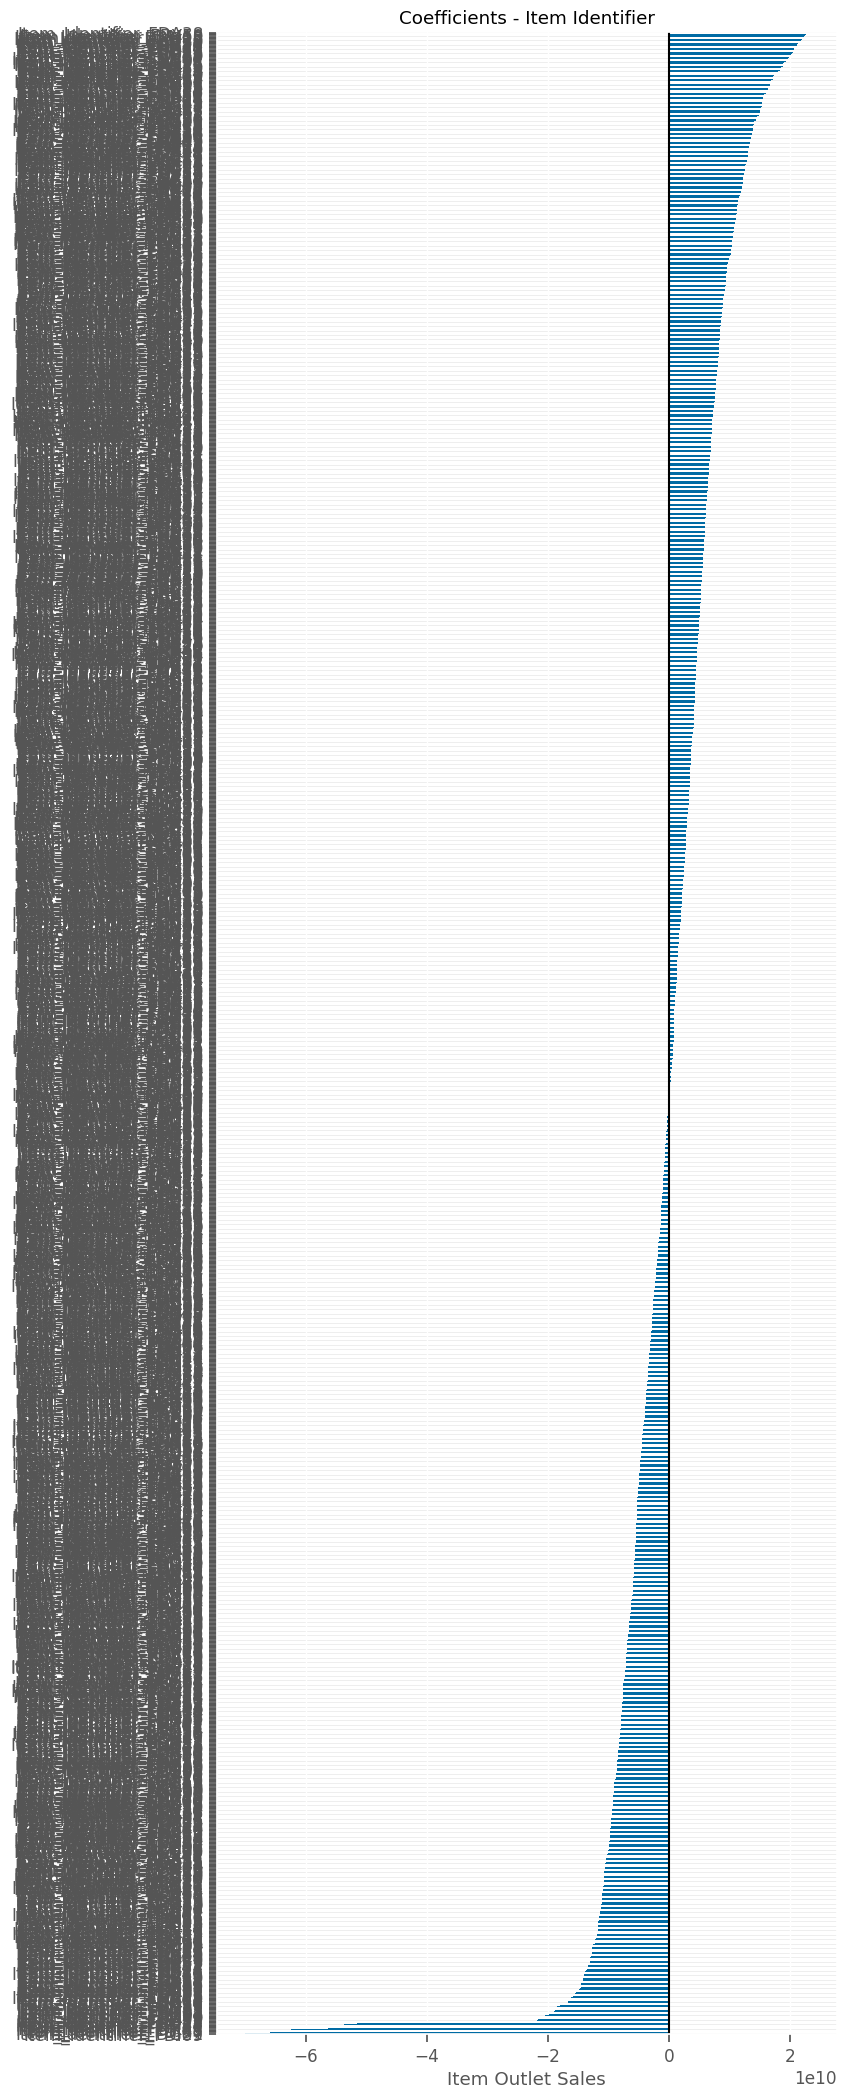

In [72]:
ax = coeffs_noint[Item_Identifier_feats].sort_values().plot(kind='barh', figsize=(8,26))
ax.axvline(0,color='k')
ax.set(xlabel='Item Outlet Sales', title='Coefficients - Item Identifier');

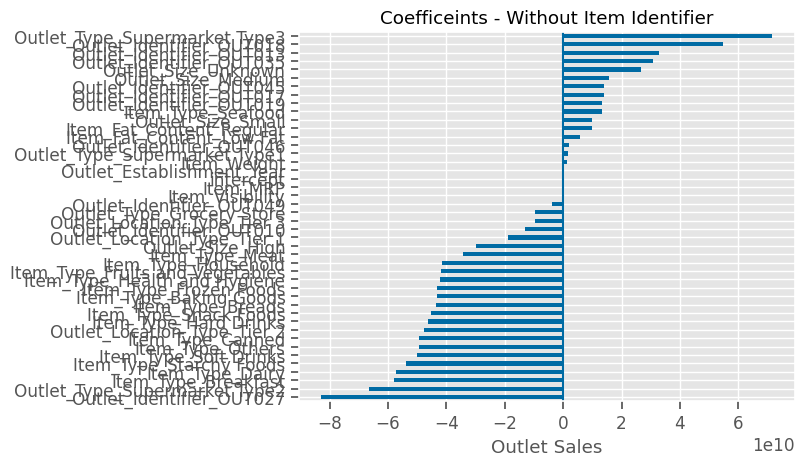

In [73]:
ax = coeffs_noint.drop(Item_Identifier_feats).sort_values().plot(kind='barh')
ax.axvline(0)
ax.set(xlabel='Outlet Sales', title='Coefficeints - Without Item Identifier');

## Model 3 - No Item Identifier

In [74]:
## Make x and y variables
target = "Item_Outlet_Sales"
drop_feats = ["Item_Identifier"]

y = df[target].copy()
X = df.drop(columns=[target, *drop_feats]).copy()

## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)

## Make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))


## Make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))

In [75]:
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns=feature_names,
                          index=X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          columns=feature_names,
                          index=X_test.index)


In [76]:
lin_reg= LinearRegression(fit_intercept=False)
lin_reg.fit(X_train_df,y_train)
evaluate_regression(lin_reg, X_train_df, y_train, 
                    X_test_df, y_test)

Training Data:	R^2= 0.56	RMSE= 1114.97
Test Data:	R^2= 0.56	RMSE= 1164.44


Split,R^2,MAE,RMSE
Train,0.56,826.82,"1,114.97"
Test,0.56,859.99,"1,164.44"


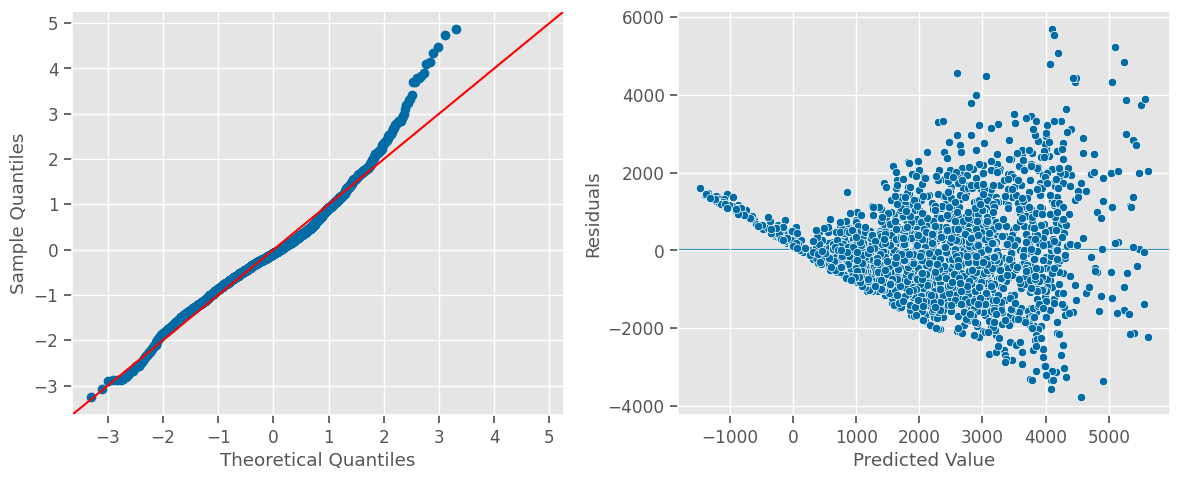

In [77]:
de.plot_residuals(lin_reg, X_test_df,y_test)

In [78]:
coeffs = get_coefficients(lin_reg)
coeffs

Item_Weight                          1.4151
Item_Visibility                   -276.3386
Item_MRP                            15.6008
Outlet_Establishment_Year           -0.1281
Item_Fat_Content_Low Fat           -14.7001
Item_Fat_Content_Regular            16.8262
Item_Type_Baking Goods               9.2605
Item_Type_Breads                    -3.1274
Item_Type_Breakfast                 69.9246
Item_Type_Canned                    22.7808
Item_Type_Dairy                    -48.9072
Item_Type_Frozen Foods              -5.2194
Item_Type_Fruits and Vegetables     15.9538
Item_Type_Hard Drinks               50.0564
Item_Type_Health and Hygiene       -41.4632
Item_Type_Household                -68.9741
Item_Type_Meat                     -15.8110
Item_Type_Others                    17.1409
Item_Type_Seafood                   98.9951
Item_Type_Snack Foods              -11.6828
Item_Type_Soft Drinks             -117.3408
Item_Type_Starchy Foods             30.5399
Outlet_Identifier_OUT010        

<AxesSubplot: >

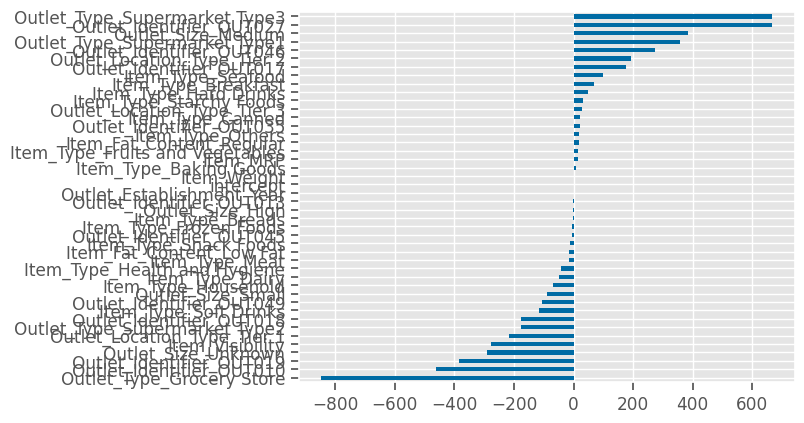

In [79]:
coeffs.sort_values().plot(kind='barh')

## Model 3: Dropping Categories with OneHotEncoder

In [80]:
## make pipelines for categorical vs numeric data
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(drop='if_binary', sparse=False,
                                      ))
cat_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(drop='if_binary', sparse=False))])

In [81]:
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out=False)
preprocessor

preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns=feature_names,
                         index=X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          columns=feature_names,
                         index=X_test.index)
display(X_train_df.head())

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8269,7.2200,0.0641,61.2510,"1,998.0000",1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000
7604,6.1350,0.0793,111.2860,"2,009.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000
2762,12.1500,0.0286,151.0708,"2,004.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000
6464,5.9450,0.0930,127.8652,"2,004.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4707,18.2000,0.0663,247.2092,"2,004.0000",1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000


Training Data:	R^2= 0.56	RMSE= 1114.97
Test Data:	R^2= 0.56	RMSE= 1164.44


Split,R^2,MAE,RMSE
Train,0.56,826.82,"1,114.97"
Test,0.56,859.99,"1,164.44"


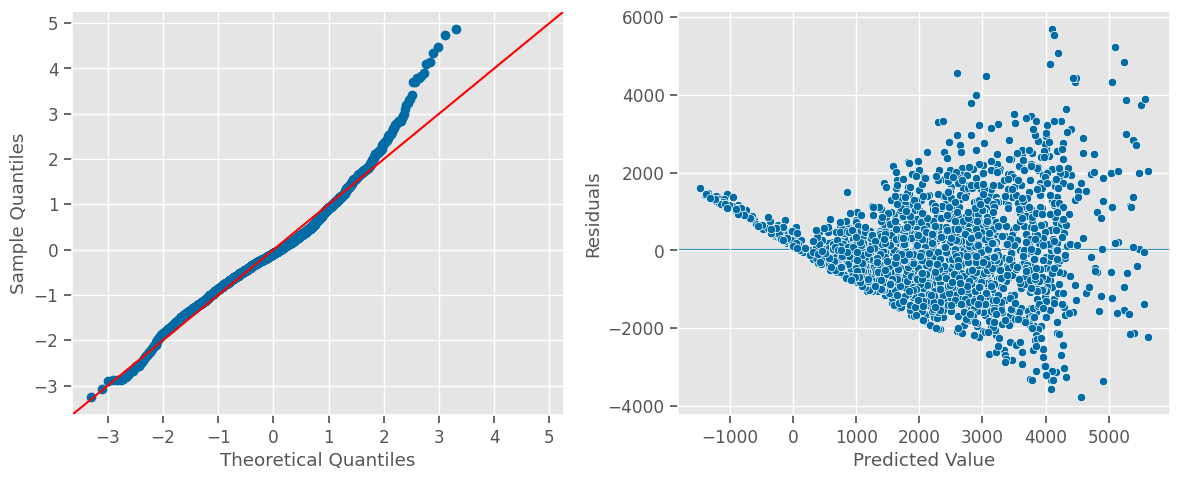

In [82]:

lin_reg_drop = LinearRegression(fit_intercept=False)
lin_reg_drop.fit(X_train_df,y_train)
evaluate_regression(lin_reg_drop, X_train_df, y_train, 
                    X_test_df, y_test)

de.plot_residuals(lin_reg_drop, X_test_df,y_test)

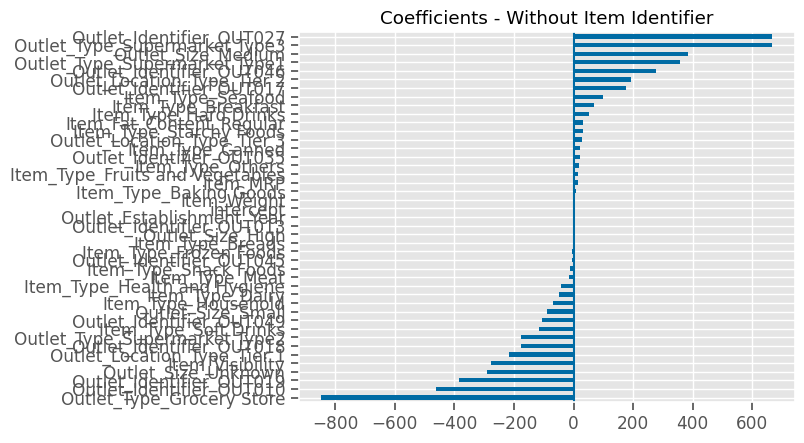

In [83]:
coeffs_dropped = get_coefficients(lin_reg_drop)


ax = coeffs_dropped.sort_values().plot(kind='barh')#, figsize=(8,26))
ax.axvline(0)
ax.set(xlabel='', title="Coefficients - Without Item Identifier");

In [85]:
# Get the feature names
feature_names = lin_reg_drop.feature_names_in_

# Get the coefficients
coefficients = lin_reg_drop.coef_

# Create a pandas Series with coefficients and feature names
importances = pd.Series(coefficients, index=feature_names)
print(importances)

Item_Weight                          1.4151
Item_Visibility                   -276.3386
Item_MRP                            15.6008
Outlet_Establishment_Year           -0.1355
Item_Fat_Content_Regular            31.5263
Item_Type_Baking Goods               9.2604
Item_Type_Breads                    -3.1275
Item_Type_Breakfast                 69.9246
Item_Type_Canned                    22.7808
Item_Type_Dairy                    -48.9073
Item_Type_Frozen Foods              -5.2195
Item_Type_Fruits and Vegetables     15.9538
Item_Type_Hard Drinks               50.0563
Item_Type_Health and Hygiene       -41.4633
Item_Type_Household                -68.9742
Item_Type_Meat                     -15.8111
Item_Type_Others                    17.1408
Item_Type_Seafood                   98.9951
Item_Type_Snack Foods              -11.6829
Item_Type_Soft Drinks             -117.3409
Item_Type_Starchy Foods             30.5398
Outlet_Identifier_OUT010          -461.7630
Outlet_Identifier_OUT013        

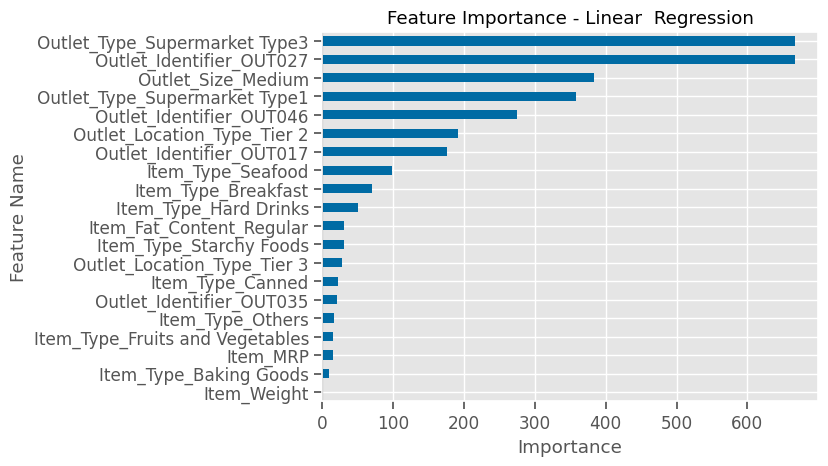

In [86]:
ax = importances.sort_values().tail(20).plot(kind='barh')#,figsize=(6,4))
ax.axvline(0, color='k')
ax.set(title='Feature Importance - Linear  Regression',ylabel="Feature Name",
      xlabel='Importance');

### The Top 3 feature importance names are the following: 
1. Outlet_Type Sypermarket Type 3
2. Outlet Identifier OUT027
3. Outlet Size Medium
    

## Random Forest Regression

In [87]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_df,y_train)
evaluate_regression(rf_reg, X_train_df,y_train,X_test_df,y_test)

Training Data:	R^2= 0.94	RMSE= 420.86
Test Data:	R^2= 0.57	RMSE= 1152.04


Split,R^2,MAE,RMSE
Train,0.94,291.12,420.86
Test,0.57,810.67,"1,152.04"


In [88]:
## Saving the coefficients
importances = pd.Series(rf_reg.feature_importances_, index= rf_reg.feature_names_in_)
importances

Item_Weight                       0.0730
Item_Visibility                   0.0905
Item_MRP                          0.4364
Outlet_Establishment_Year         0.0275
Item_Fat_Content_Regular          0.0077
Item_Type_Baking Goods            0.0045
Item_Type_Breads                  0.0028
Item_Type_Breakfast               0.0023
Item_Type_Canned                  0.0043
Item_Type_Dairy                   0.0048
Item_Type_Frozen Foods            0.0052
Item_Type_Fruits and Vegetables   0.0080
Item_Type_Hard Drinks             0.0026
Item_Type_Health and Hygiene      0.0040
Item_Type_Household               0.0059
Item_Type_Meat                    0.0034
Item_Type_Others                  0.0016
Item_Type_Seafood                 0.0013
Item_Type_Snack Foods             0.0079
Item_Type_Soft Drinks             0.0041
Item_Type_Starchy Foods           0.0031
Outlet_Identifier_OUT010          0.0000
Outlet_Identifier_OUT013          0.0015
Outlet_Identifier_OUT017          0.0032
Outlet_Identifie

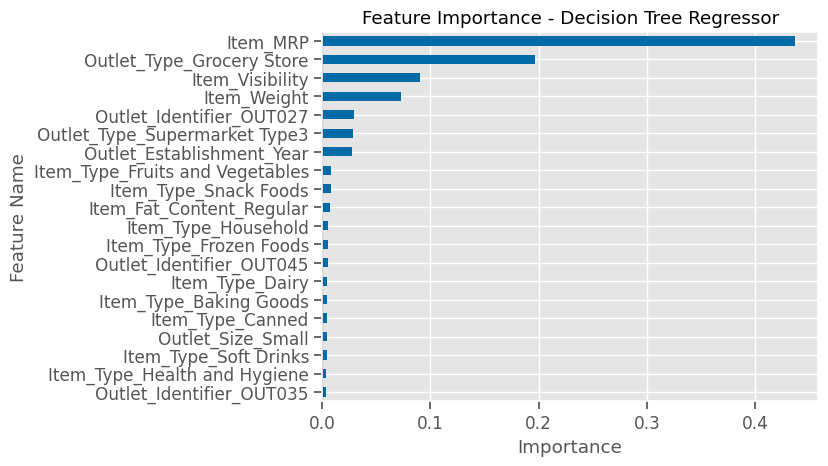

In [89]:
ax = importances.sort_values().tail(20).plot(kind='barh')#,figsize=(6,4))
ax.axvline(0, color='k')
ax.set(title='Feature Importance - Decision Tree Regressor',ylabel="Feature Name",
      xlabel='Importance');

### The Top 3 feature importance names are the following: 
1. Item MRP
2. Outlet Type Grocery Store
3. Item Visibility

## Using joblib to save models

In [90]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8269,7.2200,Regular,0.0641,Baking Goods,61.2510,OUT010,1998,Unknown,Tier 3,Grocery Store
7604,6.1350,Low Fat,0.0793,Soft Drinks,111.2860,OUT018,2009,Medium,Tier 3,Supermarket Type2
2762,12.1500,Low Fat,0.0286,Household,151.0708,OUT035,2004,Small,Tier 2,Supermarket Type1
6464,5.9450,Low Fat,0.0930,Household,127.8652,OUT035,2004,Small,Tier 2,Supermarket Type1
4707,18.2000,Regular,0.0663,Fruits and Vegetables,247.2092,OUT035,2004,Small,Tier 2,Supermarket Type1


In [91]:
evaluate_regression(lin_reg_drop,X_train_df,y_train, X_test_df, y_test)

Training Data:	R^2= 0.56	RMSE= 1114.97
Test Data:	R^2= 0.56	RMSE= 1164.44


Split,R^2,MAE,RMSE
Train,0.56,826.82,"1,114.97"
Test,0.56,859.99,"1,164.44"


In [92]:
evaluate_regression(rf_reg,X_train_df,y_train, X_test_df, y_test)

Training Data:	R^2= 0.94	RMSE= 420.86
Test Data:	R^2= 0.57	RMSE= 1152.04


Split,R^2,MAE,RMSE
Train,0.94,291.12,420.86
Test,0.57,810.67,"1,152.04"


In [94]:
import joblib, os

## creating a dictionary of all of the variables to save for later
export = {'X_train':X_train,
         'y_train':y_train,
         'X_test':X_test,
         'y_test':y_test,
          'preprocessor':preprocessor,
         'LinearRegression': lin_reg_drop,
          'RandomForestRegressor':rf_reg
         }

In [95]:
folder = "Models/"
os.makedirs(folder, exist_ok=True)

In [96]:
fname = folder+'My Best Models with Feature Importance.joblib'
joblib.dump(export, fname)

['Models/My Best Models with Feature Importance.joblib']

In [97]:
loaded = joblib.load(fname)
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForestRegressor'])